In [39]:
#Nome: Pedro Paulo de Avelar Fioresi Gadioli
#RA: 22009447
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sqrt

def plot_harmonics(n, row, col, index, t, serie):                                   #Função para plotar um gráfico com certo número de harmonicos e com uma função específica
    plt.subplot(row, col, index)
    plt.title(f'{n} harmônicos')
    plt.plot(t, np.real(serie(n)))

def plot_all_harmonics(t, harmonics_list, serie):                                   #Função para plotar varios gráficos com diferentes harmonicos dada a função
    num_plots = len(harmonics_list)
    row = 2
    col = (num_plots + 1) // 2
    fig = plt.figure(figsize=(24, 8))
    for i, n in enumerate(harmonics_list):
        plot_harmonics(n, row, col, i + 1, t, serie)
    plt.tight_layout()
    plt.show()

In [100]:
%%latex
Para a Série Trigonométrica de Fourier sobre a função $f(t)=|sin(t)| \\$
Primeiramente vamos calcular o valor de $a_0$, sendo $a_0=\frac{1}{T_0}\int_{t_1}^{t_1+T_0}g(t)dt$, onde $g(t)=|sin(t)|$ e período $T_0=\pi$, como é mostrado no gráfico.

$\\$ Então temos $a_0 = \frac{1}{\pi}\int_{0}^{\pi}|sin(t)|dt$
$$a_0 = \frac{1}{\pi}\int_{0}^{\pi}|sin(t)|dt \\ = \frac{1}{\pi}[-cos(t)]_{0}^{\pi} \\ =\frac{2}{\pi}$$
Agora vamos calcular os coeficientes seno e cosseno, porem como podemos observar no gráfico a função é par, sendo assim o coeficiente seno é igual a zero.
$\\ $ Sendo $a_n=\frac{2}{T_0}\int_{t_1}^{t_1+T_0}g(t)cos(2\pi nf_0t)dt$
$$a_n=\frac{2}{\pi}\int_{t_1}^{t_1+T_0}g(t)cos(\frac{2\pi nt}{\pi})dt \\ =\frac{2}{\pi}\int_{0}^{\pi}|sin(t)|cos(2nt)dt \\ =\frac{2}{\pi}\frac{2cos^2(\pi n)}{1-4n^2} \\ a_n=\frac{4cos^2(\pi n)}{\pi (1-4n^2)}$$
$\\ $ Com isso podemos montar a equação para a série trigonométrica de Fourier
$$= a_0 + \sum_{n=1}^{\infty}a_n cos(\frac{2 \pi n t}{\pi}) \\ =\frac{2}{\pi} + \sum_{n=1}^{\infty}\frac{4cos^2(\pi n)}{\pi (1-4n^2)} cos(\frac{2 \pi n t}{\pi})$$



<IPython.core.display.Latex object>

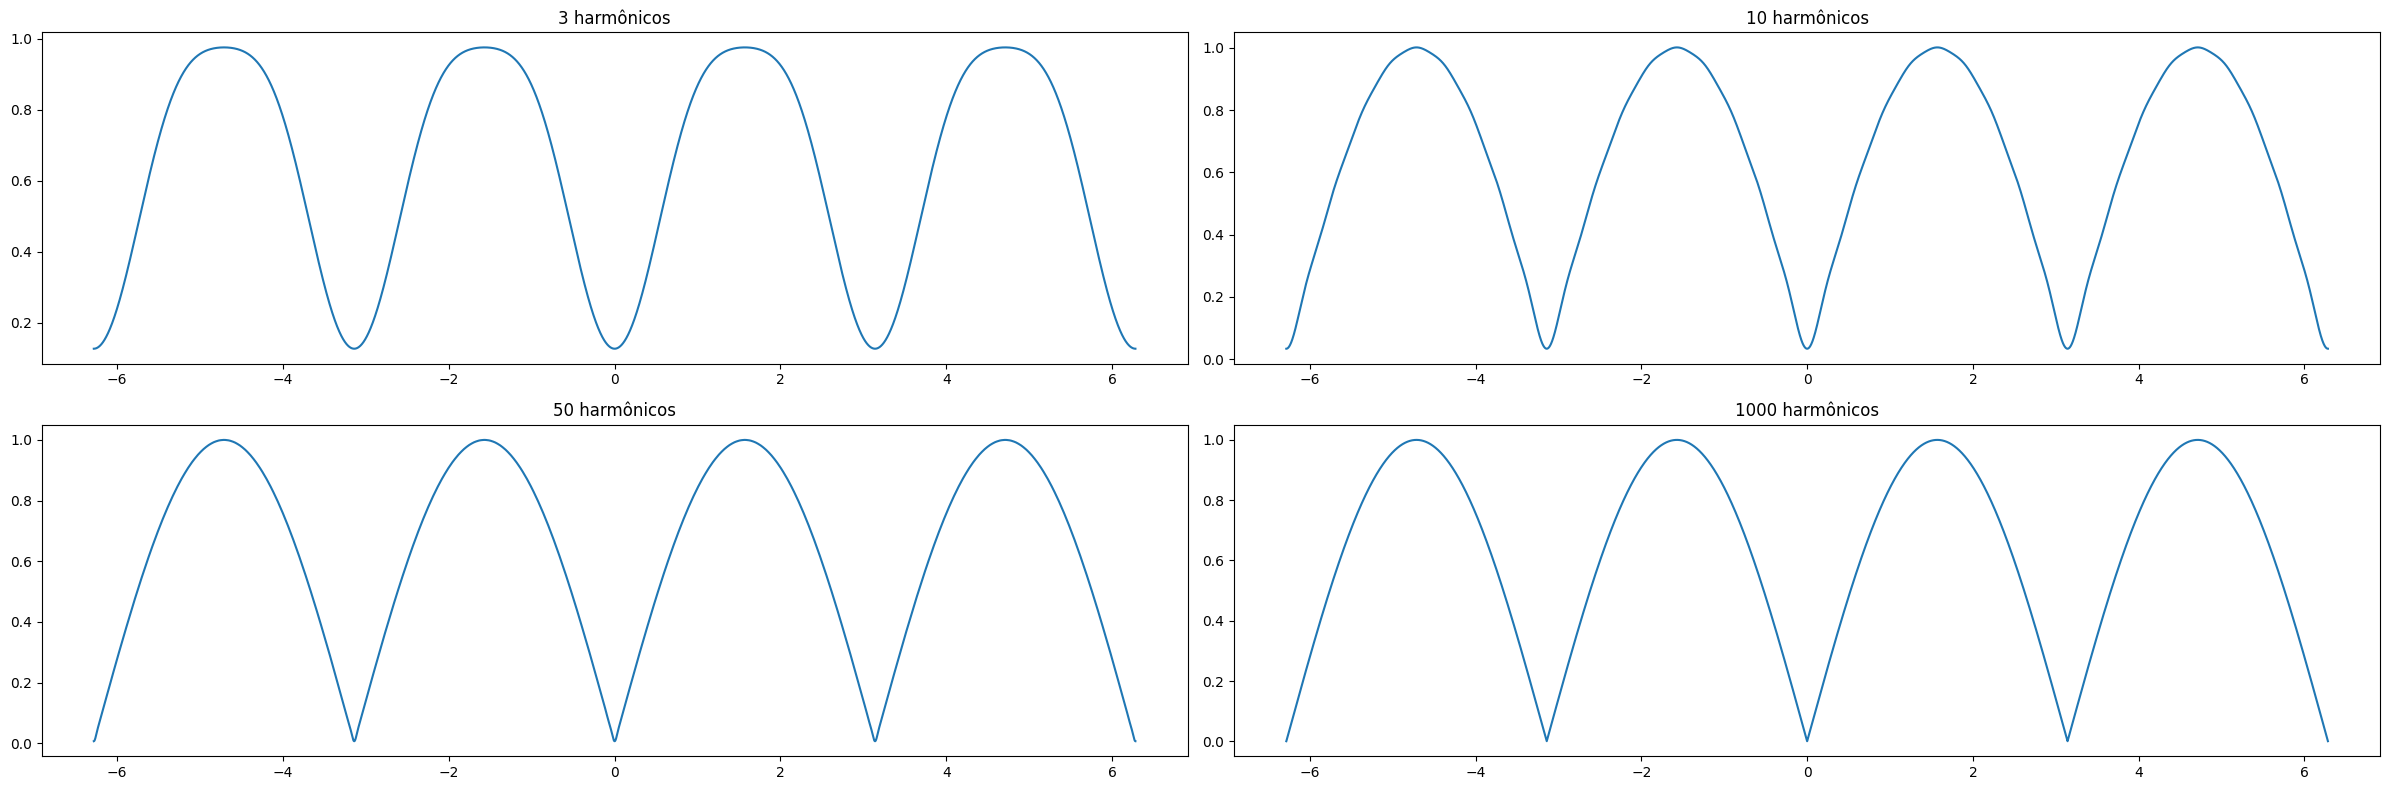

In [45]:
#Série Trigonométrica de Fourier

t = np.arange(-2*pi, 2*pi, 0.001)                                 # Limitando a variação entre -2pi e 2pi com passo 0,001

def trigonometric_serie(Nh):                                          # Cálculo da série trigonométrical em relação à quantidade de harmônicos
    x = np.zeros(t.shape).astype('complex128')                 # Inicialização do vetor para o resultado
    n = 1
    for n in range(1, Nh, 1):                        # Somatório
                                                               
        x += ((4*pow((pow(-1,n)),2))/(pi*(1-4*(pow(n,2)))))*np.cos(2*n*t)              #utilizei a identidade básica da trigonometria para transformar o cos^2(pi*n) em ((-1)^n)^2

    x += 2/pi
    return x

harmonics_list = [3, 10, 50, 1000]                               #Define a lista com os numeros de harmonicos

plot_all_harmonics(t, harmonics_list, trigonometric_serie)

In [21]:
%%latex
Para a Série Exponencial de Fourier $g(t)=\sum_{n=-\infty}^\infty D_ne^{j2\pi n\omega_0t}$, sobre a função $f(t)=|sin(t)| \\$
Primeiramente devemos encontrar o valor de $D_n$ que se da pela equação:
$$D_n=\frac{1}{T_0}\int_{T_0}g(t)e^{-j2\pi n\omega_0 t}dt $$
Porem com a relação $a_n-jb_n=2D_n$ é mais simples, tendo em vista que ja calculamos  $a_n$ e $b_n$ anteriormente.
$$a_n=\frac{4cos^2(\pi n)}{\pi (1-4n^2)} \\ b_n = 0 \\(funcão par)\\ 2D_n = \frac{4cos^2(\pi n)}{\pi (1-4n^2)} - j0 \\ D_n = \frac{4cos^2(\pi n)}{\pi (1-4n^2)} \frac{1}{2} \\ D_n = \frac{2cos^2(\pi n)}{\pi (1-4n^2)}$$
Agora que temos o valor de $D_n$, podemos escrever a Série Exponencial, substituindo tambem  o valor de $\omega_0 = \frac{2\pi}{T_0} = \frac{2\pi}{\pi} = 2$
$$g(t)=\sum_{n=-\infty}^\infty D_ne^{j2\pi n\omega_0t} \\ substituindo \\ g(t)=\sum_{n=-\infty}^\infty \frac{2cos^2(\pi n)}{\pi (1-4n^2)}e^{j4\pi nt} \\ g(t)=\sum_{n=-\infty}^\infty \frac{2cos^2(\pi n)e^{j4\pi nt}}{\pi (1-4n^2)}$$

<IPython.core.display.Latex object>

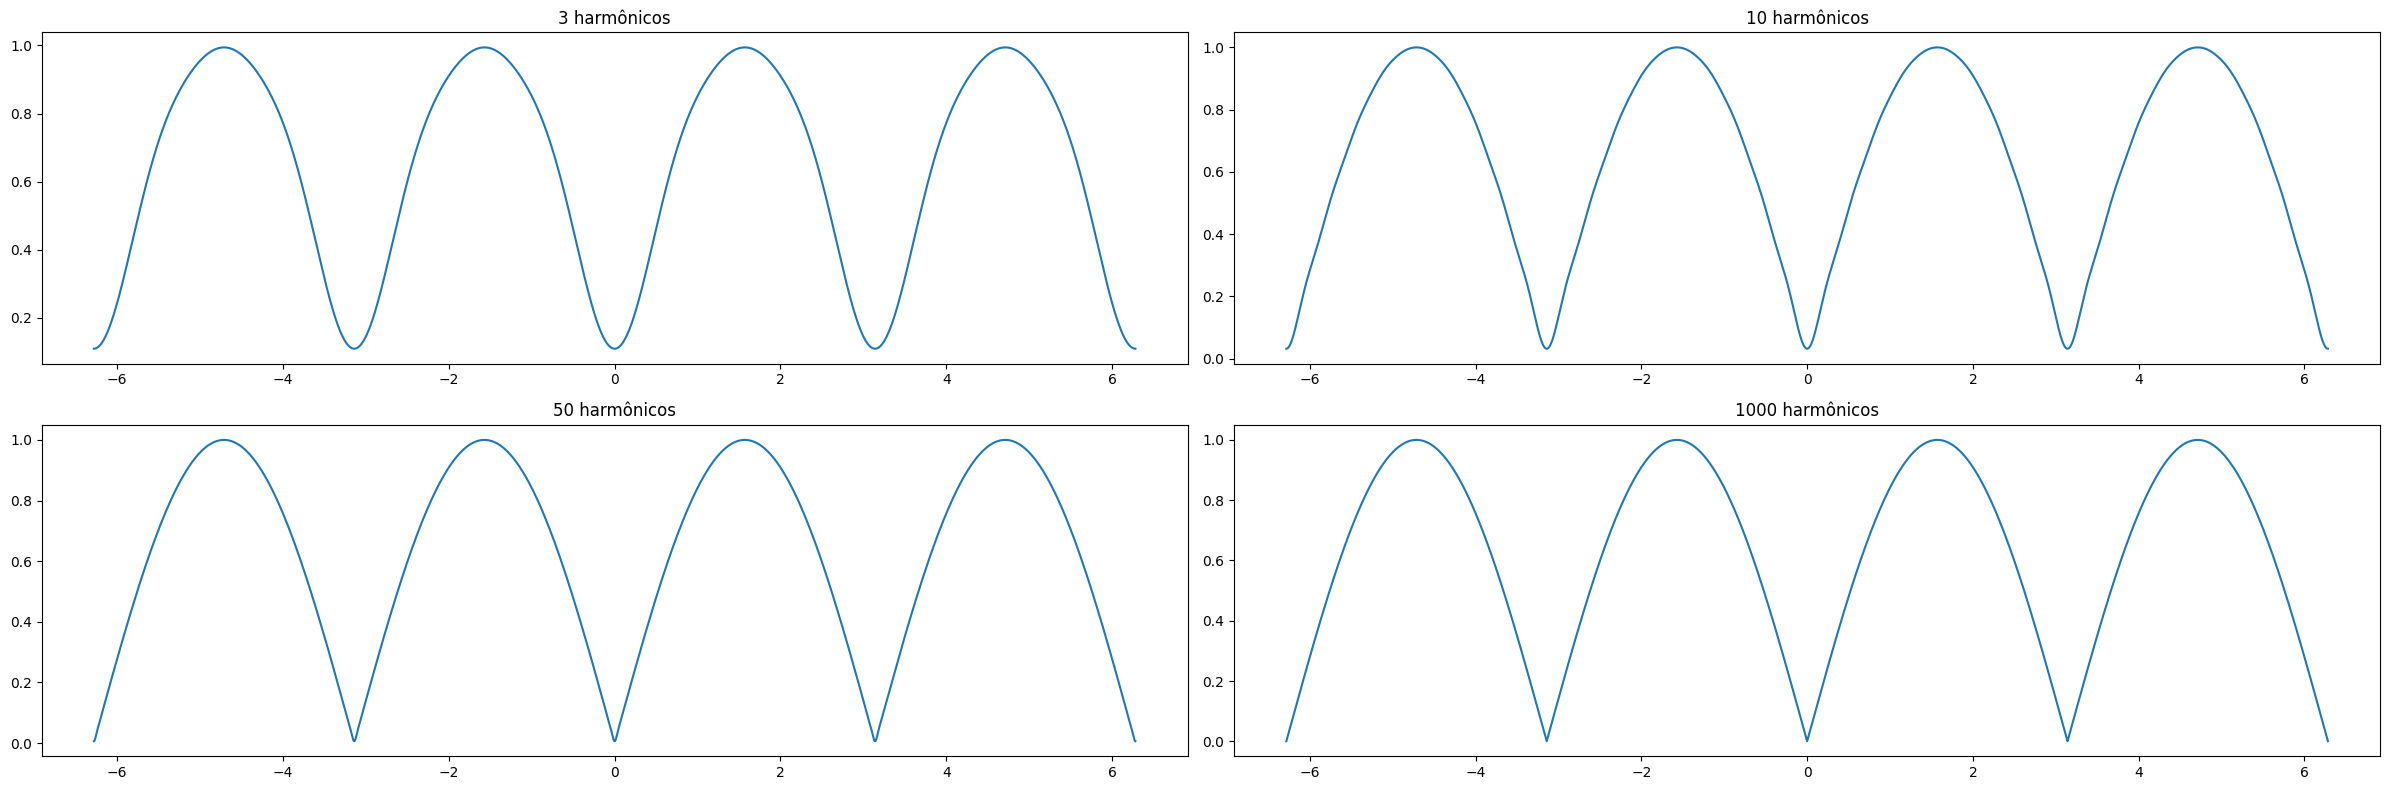

In [38]:
#Série Exponencial de Fourier

t = np.arange(-2*pi, 2*pi, 0.001)                                 # Limitando a variação entre -2pi e 2pi com passo 0,001
j = np.complex128(0)                                              # Criando o número complexo j


def exponential_serie(Nh):                                          # Cálculo da série exponencial em relação à quantidade de harmônicos
    x = np.zeros(t.shape).astype('complex128')                 # Inicialização do vetor para o resultado
    
    for n in range(-Nh, Nh, 1):                        # Somatório de -Nh até Nh devido ao fato de ser uma série exponencial
                                               
        x += ((2*pow((pow(-1,n)),2) * np.exp(j * 4 * pi * n * t))/(pi*(1-4*(pow(n,2)))))*np.cos(2*n*t)            

    
    return x

harmonics_list = [3, 10, 50, 1000]                               #Define a lista com os numeros de harmonicos

plot_all_harmonics(t, harmonics_list, exponential_serie)